In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Датасет

Набор данных, позволяющий по различным признакам сетевой активности определять, происходит ли атака злоумышленника на сеть или нет.

Признаки:

<b>1. Sport</b> – source port, порт назначения<br>
<b>2. TotPkts</b> – total packets, общее количество пакетов<br>
<b>3. TotBytes</b> – total bytes, общее количество байт<br>
<b>4. SrcPkts</b> – source packets, количество пакетов источника<br>
<b>5. DstPkts</b> – destination packets, количество пакетов получателя<br>
<b>6. SrcBytes</b> – source bytes, количество байт источника<br>
<b>7. service</b> – тип службы (прикладной уровень)<br>
<b>8. flag</b> – служебный флаг<br>
<b>9. protocol_type</b> – тип протокола<br>
<b>10. count</b> – счетчик<br>
<b>11. srv_count</b> – счетчик сервера<br>
<b>12. dst_host_count</b> – счетчик хоста назначения<br>
<b>13. dst_host_same_srv_rate</b> – интенсивность нагрузки от того же сервера к хосту назначения<br>
<b>14. dst_host_diff_srv_rate</b> – интенсивность нагрузки от другого сервера к хосту назначения<br>
<b>15. dst_bytes</b> – destination bytes, количество байт получателя<br>
<b>16. class</b> – класс трафика (атака или нет), <b>целевой признак</b><br>

<b>ЗАДАЧА:</b> бинарная классификация по критерию "атака/не атака"


https://www.kaggle.com/datasets/ameerhamza123/intrusion-detection-dataset

## 0. Загрузка данных

In [2]:
df = pd.read_csv('../content/IDS_Data1.csv')
df.head()

,Sport,TotPkts,TotBytes,SrcPkts,DstPkts,SrcBytes,service,flag,protocol_type,count,srv_count,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_bytes,class
0,143,2,180,2,0,180,ftp_data,SF,tcp,2,2,150,0.17,0.03,0,normal
1,68,2,684,2,0,684,other,SF,udp,13,1,255,0.00,0.60,0,normal
2,0,1,60,1,0,60,private,S0,tcp,123,6,255,0.10,0.05,0,anomaly
3,54949,10,628,4,6,248,http,SF,tcp,5,5,30,1.00,0.00,8153,normal
4,54943,8,496,4,4,248,http,SF,tcp,30,32,255,1.00,0.00,420,normal


## 1. Первичный и визуальный анализ данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sport                   25192 non-null  int64  
 1   TotPkts                 25192 non-null  int64  
 2   TotBytes                25192 non-null  int64  
 3   SrcPkts                 25192 non-null  int64  
 4   DstPkts                 25192 non-null  int64  
 5   SrcBytes                25192 non-null  int64  
 6   service                 25192 non-null  object 
 7   flag                    25192 non-null  object 
 8   protocol_type           25192 non-null  object 
 9   count                   25192 non-null  int64  
 10  srv_count               25192 non-null  int64  
 11  dst_host_count          25192 non-null  int64  
 12  dst_host_same_srv_rate  25192 non-null  float64
 13  dst_host_diff_srv_rate  25192 non-null  float64
 14  dst_bytes               25192 non-null

In [4]:
df.isna().sum()

Sport                     0
TotPkts                   0
TotBytes                  0
SrcPkts                   0
DstPkts                   0
SrcBytes                  0
service                   0
flag                      0
protocol_type             0
count                     0
srv_count                 0
dst_host_count            0
dst_host_same_srv_rate    0
dst_host_diff_srv_rate    0
dst_bytes                 0
class                     0
dtype: int64

В датасете 25192 наблюдения, 16 признаков: 12 вещественных и 4 категориальных. Пропусков нет. Целевой признак - `class`.

In [5]:
df.describe()

,Sport,TotPkts,TotBytes,SrcPkts,DstPkts,SrcBytes,count,srv_count,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_bytes
count,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,2.519200e+04
mean,57444.728168,19.738568,1427.790013,10.428072,9.310495,800.189663,84.591180,27.698754,182.532074,0.519791,0.082539,3.491847e+03
std,6958.325958,16.517261,4403.278994,9.532412,7.042980,3192.733984,114.673451,72.468242,98.993895,0.448944,0.187191,8.883072e+04
min,0.000000,1.000000,60.000000,1.000000,0.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,55078.000000,18.000000,1152.000000,10.000000,8.000000,644.000000,2.000000,2.000000,84.000000,0.050000,0.000000,0.000000e+00
50%,58224.500000,20.000000,1276.000000,10.000000,10.000000,644.000000,14.000000,8.000000,255.000000,0.510000,0.030000,0.000000e+00
75%,61375.250000,20.000000,1276.000000,10.000000,10.000000,644.000000,144.000000,18.000000,255.000000,1.000000,0.070000,5.302500e+02
max,65534.000000,360.000000,91280.000000,210.000000,150.000000,66080.000000,511.000000,511.000000,255.000000,1.000000,1.000000,5.151385e+06


In [6]:
# разделение признаков на категории
num_features = list(df.select_dtypes(['int64', 'float64']).columns)
cat_features = list(df.select_dtypes(['object']).columns)
target_feature = cat_features.pop()

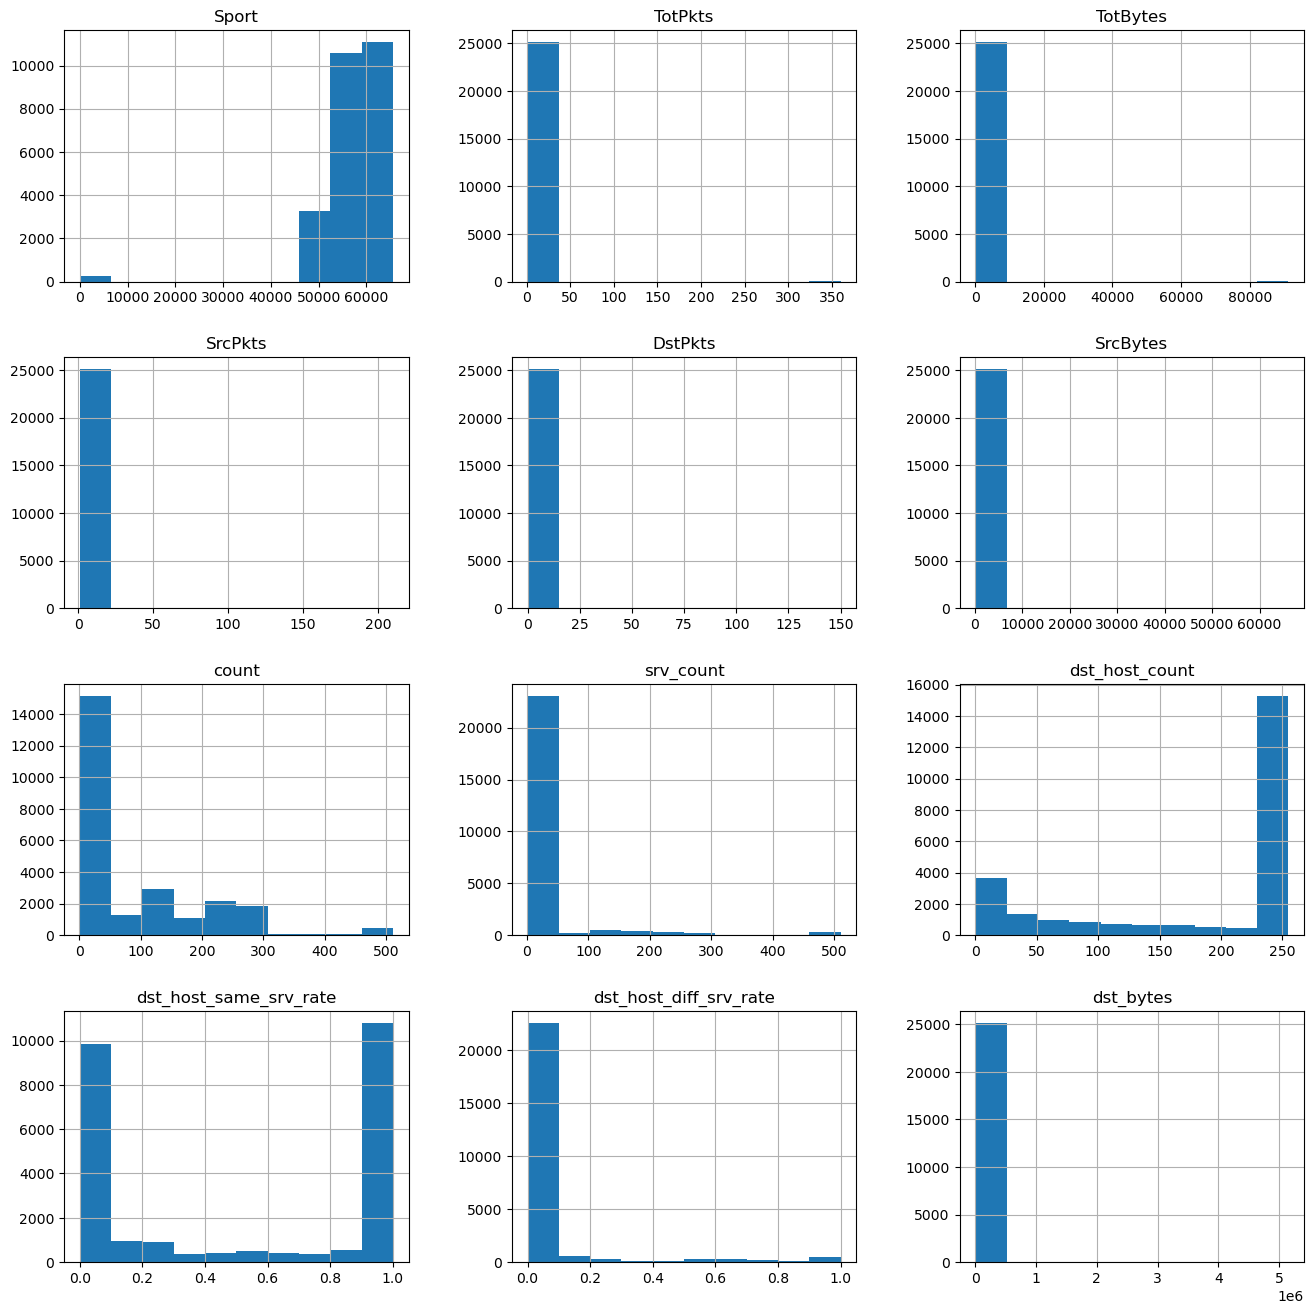

In [7]:
df.hist(num_features, figsize=(16, 16));

In [8]:
for cat_feature in cat_features:
    print(df[cat_feature].value_counts())
    print(50 * '*')

http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: service, Length: 66, dtype: int64
**************************************************
SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: flag, dtype: int64
**************************************************
tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64
**************************************************


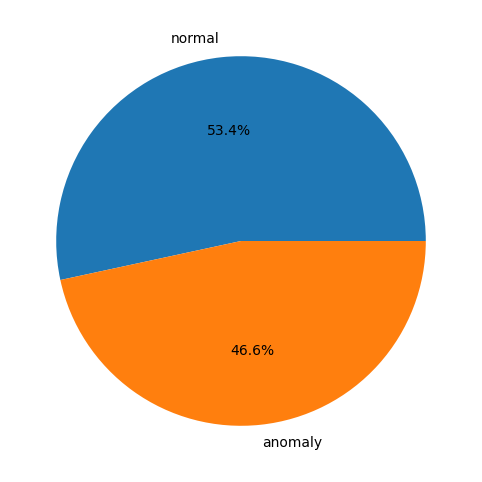

In [9]:
df_to_pie = df[target_feature].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(df_to_pie.values, labels=df_to_pie.index, autopct='%.1f%%');

Все вещественные признаки имеют выбросы. Целевой признак `class` распределен практически равномерно.

Категориальный признак `service` имеет 66 различных значений, признак `flag` – 11.

<b>Матрица корреляций:</b>

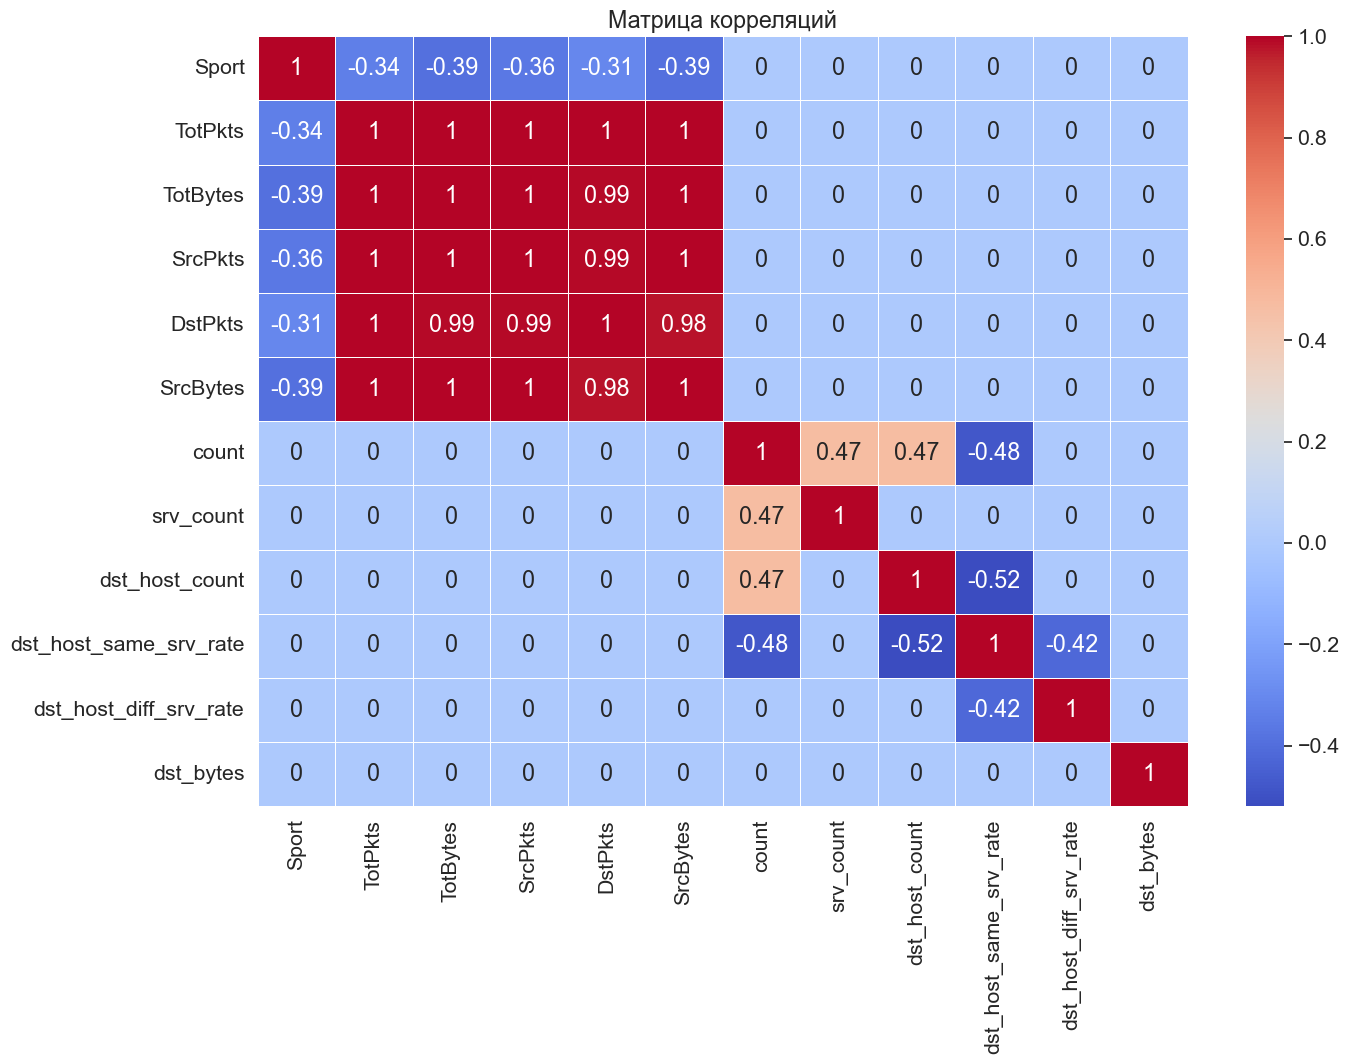

In [10]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0

plt.figure(figsize=(15, 10))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Матрица корреляций')
plt.show()

Имеется квадрат с сильными линейными зависимостями в верхней левой части матрицы. Это связано с тем, что, например, признак `TotPkts` есть сумма признаков `SrcPkts` и `DstPkts`. Так же, соответственно, и для признака `TotBytes`.

Признак `dst_bytes`, очевидно, бесполезен, потому как коррелирует только с самим собой.

## 2. Базовое решение

In [11]:
# бинарное кодирование целевого признака
df.loc[df[target_feature] == 'anomaly', target_feature] = 1
df.loc[df[target_feature] == 'normal', target_feature] = 0
df['class'] = df['class'].astype('int')

df['class'].value_counts()

0    13449
1    11743
Name: class, dtype: int64

Разделение данных на обучающие и тестовые выборки и их стандартизация:

In [12]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(df[num_features],
                                                    df[target_feature],
                                                    test_size=0.2,
                                                    stratify=df[target_feature],
                                                    random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Обучение модели:

In [13]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [14]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
pred_proba_train = lr.predict_proba(X_train)
pred_proba_test = lr.predict_proba(X_test)

pred_train[:5], pred_proba_train[:, 1]

(array([0, 1, 0, 0, 0]),
 array([0.06036247, 0.99970658, 0.10480025, ..., 0.05453784, 0.09962188,
        0.99995673]))

Подготовка датафрейма и функции для сбора и отображения статистики:

In [15]:
stata = pd.DataFrame(columns=['model', 'f1_train', 'roc-auc_train', 'f1_test', 'roc-auc_test'])

In [16]:
from sklearn.metrics import roc_curve, auc, f1_score

def make_stata(pred_train, pred_test, pred_proba_train, pred_proba_test):

    fpr, tpr, _ = roc_curve(y_train, pred_proba_train[:, 1])
    roc_auc_train = auc(fpr, tpr)

    fpr, tpr, _ = roc_curve(y_test, pred_proba_test[:, 1])
    roc_auc_test = auc(fpr, tpr)

    f1_train = f1_score(y_train, pred_train, average='macro')
    f1_test = f1_score(y_test, pred_test, average='macro')

    return {
        'f1_train': f1_train,
        'roc-auc_train': roc_auc_train,
        'f1_test': f1_test,
        'roc-auc_test': roc_auc_test,
    }



Фиксирование статистики базового решения:

In [17]:
stats = make_stata(pred_train, pred_test, pred_proba_train, pred_proba_test)

stata = stata.append({
        'model': 'BaseLine',
        'f1_train': stats['f1_train'],
        'roc-auc_train': stats['roc-auc_train'],
        'f1_test': stats['f1_test'],
        'roc-auc_test': stats['roc-auc_test'],
    }, ignore_index=True)
stata

,model,f1_train,roc-auc_train,f1_test,roc-auc_test
0,BaseLine,0.873816,0.921208,0.86375,0.908631


## 3. Предобработка данных

### 3.1 Удаление неинформативных признаков

In [18]:
del num_features[3:6]            # 'SrcPkts', 'DstPkts', 'SrcBytes', 'dst_bytes'
del num_features[8]              # 'dst_bytes'
num_features

['Sport',
 'TotPkts',
 'TotBytes',
 'count',
 'srv_count',
 'dst_host_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df[num_features + cat_features],
                                                    df[target_feature],
                                                    test_size=0.2,
                                                    stratify=df[target_feature],
                                                    random_state=42)
X_train.shape, y_train.shape

((20153, 11), (20153,))

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin

class RemoveOutliers(BaseEstimator, TransformerMixin):
    
    ''' Класс для поиска выбросов из лекции '''

    def __init__(self):
        # словари
        self.lefts = {}
        self.rights = {}
        self.medians = None

    def fit(self, X, y=None):
        self.medians = X.median()

        X = X.copy()
        for col in X.columns:
            q3 = np.quantile(X[col], q=0.75)
            q1 = np.quantile(X[col], q=0.25)
            iqr = 1.5 * (q3 - q1)
            self.lefts[col] = q1 - iqr
            self.rights[col] = q3 + iqr
        return self

    def transform(self, X, y=None):
        X = X.copy()

        for col in X.columns:
          # поиск выбросов
          X.loc[~(X[col].between(self.lefts[col], self.rights[col])), col] = self.medians[col]
        return X

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_pipe = make_pipeline(
    # пайплайн для обработки вещественных признаков
    RemoveOutliers(),
    StandardScaler()
)

cat_pipe = make_pipeline(
    # пайплайн для обработки категориальных признаков
    OneHotEncoder(handle_unknown="ignore")
)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_features),
        ("cat", cat_pipe, cat_features),
    ]
)


In [22]:
X_train_transform = preprocessor.fit_transform(X_train)
X_test_transform = preprocessor.transform(X_test)

In [23]:
X_train_transform.shape

(20153, 88)

In [24]:
lr = LogisticRegression()
lr.fit(X_train_transform, y_train)

LogisticRegression()

In [25]:
pred_train = lr.predict(X_train_transform)
pred_test = lr.predict(X_test_transform)
pred_proba_train = lr.predict_proba(X_train_transform)
pred_proba_test = lr.predict_proba(X_test_transform)

pred_train[:5], pred_proba_train[:, 1]

(array([0, 1, 0, 0, 0]),
 array([0.01532694, 0.99974365, 0.02280949, ..., 0.00891862, 0.89880923,
        0.99973981]))

In [26]:
stats = make_stata(pred_train, pred_test, pred_proba_train, pred_proba_test)

stata = stata.append({
        'model': 'BaseLine_w_transform',
        'f1_train': stats['f1_train'],
        'roc-auc_train': stats['roc-auc_train'],
        'f1_test': stats['f1_test'],
        'roc-auc_test': stats['roc-auc_test'],
    }, ignore_index=True)
stata

,model,f1_train,roc-auc_train,f1_test,roc-auc_test
0,BaseLine,0.873816,0.921208,0.863750,0.908631
1,BaseLine_w_transform,0.967369,0.985603,0.966669,0.981961


## 4. Обучение нескольких подходящих моделей

### 4.1 DecisionTree

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtc = DecisionTreeClassifier(random_state=42,
                             max_depth=5,
                             min_samples_leaf=5
                             )
dtc.fit(X_train_transform, y_train)

pred_train = dtc.predict(X_train_transform)
pred_test = dtc.predict(X_test_transform)
pred_proba_train = dtc.predict_proba(X_train_transform)
pred_proba_test = dtc.predict_proba(X_test_transform)

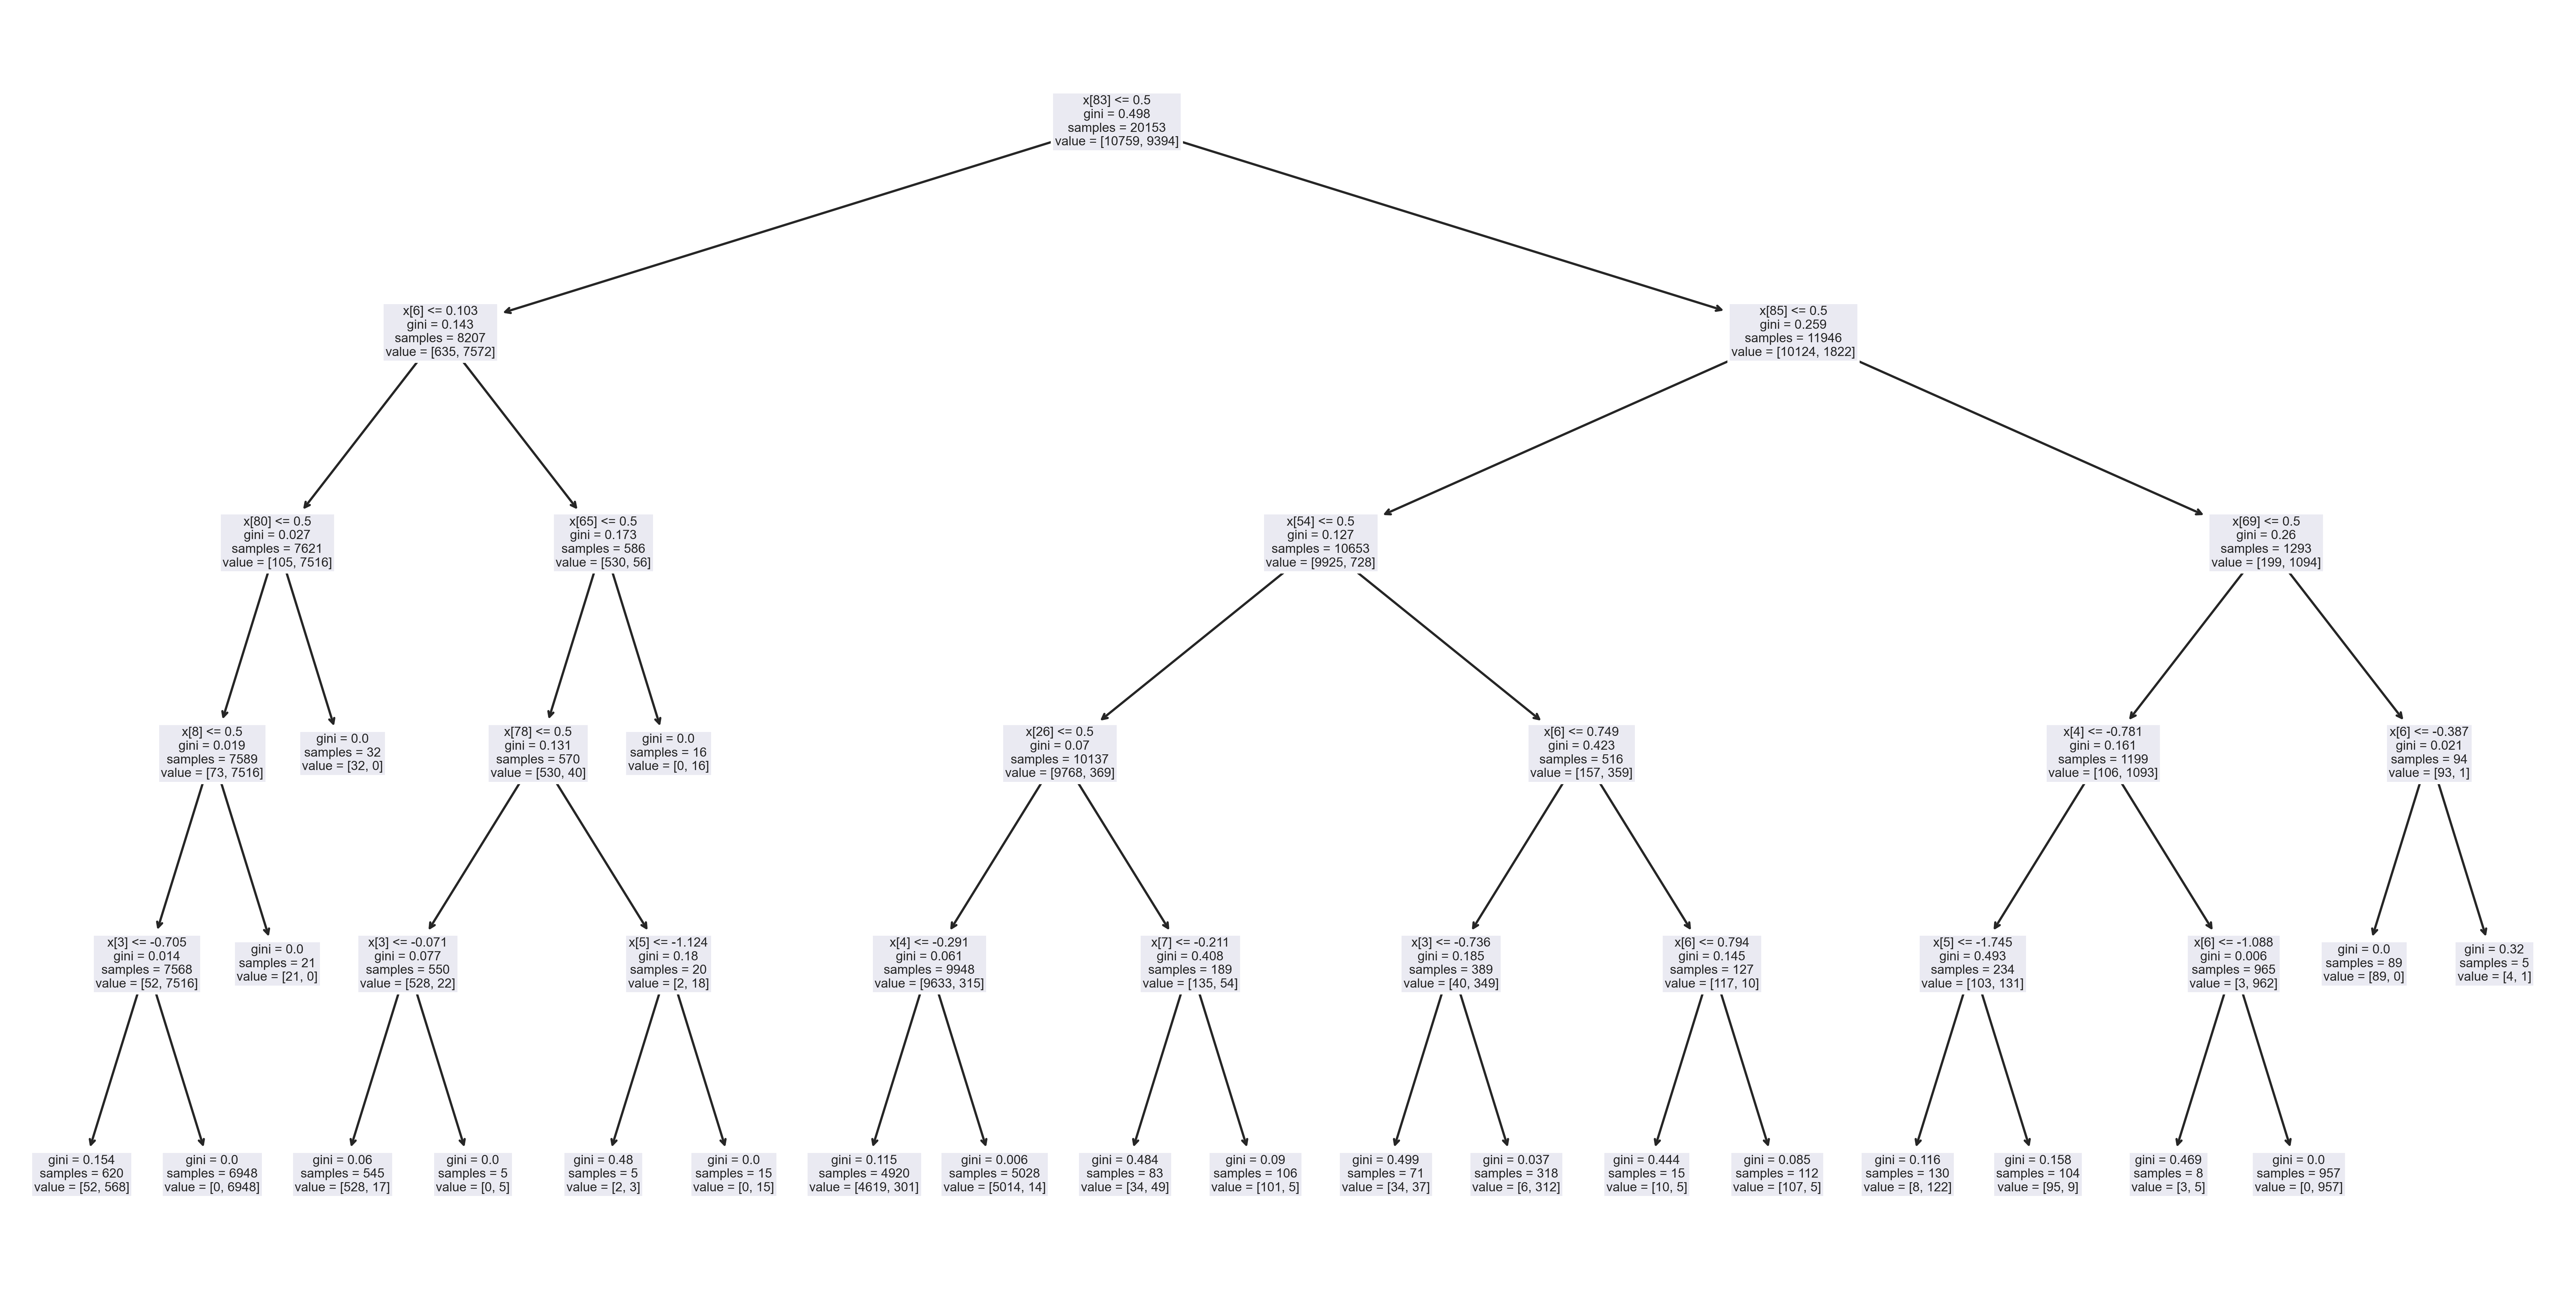

In [28]:
plt.figure(figsize=(20, 10), dpi=500)
plot_tree(dtc);

In [29]:
stats = make_stata(pred_train, pred_test, pred_proba_train, pred_proba_test)

stata = stata.append({
        'model': 'DecisionTreeClassifier',
        'f1_train': stats['f1_train'],
        'roc-auc_train': stats['roc-auc_train'],
        'f1_test': stats['f1_test'],
        'roc-auc_test': stats['roc-auc_test'],
    }, ignore_index=True)
stata

,model,f1_train,roc-auc_train,f1_test,roc-auc_test
0,BaseLine,0.873816,0.921208,0.863750,0.908631
1,BaseLine_w_transform,0.967369,0.985603,0.966669,0.981961
2,DecisionTreeClassifier,0.975235,0.989505,0.974037,0.988388


### 4.2 RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42, n_estimators=200)
rfc.fit(X_train_transform, y_train)


pred_train = rfc.predict(X_train_transform)
pred_test = rfc.predict(X_test_transform)
pred_proba_train = rfc.predict_proba(X_train_transform)
pred_proba_test = rfc.predict_proba(X_test_transform)

In [31]:
stats = make_stata(pred_train, pred_test, pred_proba_train, pred_proba_test)

stata = stata.append({
        'model': 'RandomForestClassifier',
        'f1_train': stats['f1_train'],
        'roc-auc_train': stats['roc-auc_train'],
        'f1_test': stats['f1_test'],
        'roc-auc_test': stats['roc-auc_test'],
    }, ignore_index=True)
stata

,model,f1_train,roc-auc_train,f1_test,roc-auc_test
0,BaseLine,0.873816,0.921208,0.863750,0.908631
1,BaseLine_w_transform,0.967369,0.985603,0.966669,0.981961
2,DecisionTreeClassifier,0.975235,0.989505,0.974037,0.988388
3,RandomForestClassifier,0.999950,1.000000,0.981435,0.994617


### 4.3 GradientBoostingClassifier

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_transform, y_train)


pred_train = gbc.predict(X_train_transform)
pred_test = gbc.predict(X_test_transform)
pred_proba_train = gbc.predict_proba(X_train_transform)
pred_proba_test = gbc.predict_proba(X_test_transform)

In [33]:
stats = make_stata(pred_train, pred_test, pred_proba_train, pred_proba_test)

stata = stata.append({
        'model': 'GradientBoostingClassifier',
        'f1_train': stats['f1_train'],
        'roc-auc_train': stats['roc-auc_train'],
        'f1_test': stats['f1_test'],
        'roc-auc_test': stats['roc-auc_test'],
    }, ignore_index=True)
stata

,model,f1_train,roc-auc_train,f1_test,roc-auc_test
0,BaseLine,0.873816,0.921208,0.863750,0.908631
1,BaseLine_w_transform,0.967369,0.985603,0.966669,0.981961
2,DecisionTreeClassifier,0.975235,0.989505,0.974037,0.988388
3,RandomForestClassifier,0.999950,1.000000,0.981435,0.994617
4,GradientBoostingClassifier,0.981126,0.995313,0.979227,0.993126


### 4.4 VotingClassifier

In [34]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(
    estimators=[
        ('DecisionTreeClassifier', dtc),
        ('RandomForestClassifier', rfc),
        ('GradientBoostingClassifier', gbc)
    ],
    voting='soft'
)
vc.fit(X_train_transform, y_train)

pred_train = vc.predict(X_train_transform)
pred_test = vc.predict(X_test_transform)
pred_proba_train = vc.predict_proba(X_train_transform)
pred_proba_test = vc.predict_proba(X_test_transform)

In [35]:
stats = make_stata(pred_train, pred_test, pred_proba_train, pred_proba_test)

stata = stata.append({
        'model': 'VotingClassifier',
        'f1_train': stats['f1_train'],
        'roc-auc_train': stats['roc-auc_train'],
        'f1_test': stats['f1_test'],
        'roc-auc_test': stats['roc-auc_test'],
    }, ignore_index=True)
stata

,model,f1_train,roc-auc_train,f1_test,roc-auc_test
0,BaseLine,0.873816,0.921208,0.863750,0.908631
1,BaseLine_w_transform,0.967369,0.985603,0.966669,0.981961
2,DecisionTreeClassifier,0.975235,0.989505,0.974037,0.988388
3,RandomForestClassifier,0.999950,1.000000,0.981435,0.994617
4,GradientBoostingClassifier,0.981126,0.995313,0.979227,0.993126
5,VotingClassifier,0.984821,0.999634,0.978628,0.995717


### 4.5 StackingClassifier

In [36]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(
    estimators=
    [('DecisionTreeClassifier', dtc),
    ('RandomForestClassifier', rfc),
    ('GradientBoostingClassifier', gbc)],
    final_estimator=RandomForestClassifier(random_state=42)
)

stack.fit(X_train_transform, y_train)

pred_train = stack.predict(X_train_transform)
pred_test = stack.predict(X_test_transform)
pred_proba_train = stack.predict_proba(X_train_transform)
pred_proba_test = stack.predict_proba(X_test_transform)

In [37]:
stats = make_stata(pred_train, pred_test, pred_proba_train, pred_proba_test)

stata = stata.append({
        'model': 'StackingClassifier',
        'f1_train': stats['f1_train'],
        'roc-auc_train': stats['roc-auc_train'],
        'f1_test': stats['f1_test'],
        'roc-auc_test': stats['roc-auc_test'],
    }, ignore_index=True)
stata

,model,f1_train,roc-auc_train,f1_test,roc-auc_test
0,BaseLine,0.873816,0.921208,0.863750,0.908631
1,BaseLine_w_transform,0.967369,0.985603,0.966669,0.981961
2,DecisionTreeClassifier,0.975235,0.989505,0.974037,0.988388
3,RandomForestClassifier,0.999950,1.000000,0.981435,0.994617
4,GradientBoostingClassifier,0.981126,0.995313,0.979227,0.993126
5,VotingClassifier,0.984821,0.999634,0.978628,0.995717
6,StackingClassifier,0.991766,0.999693,0.980834,0.993667


In [38]:
stata.sort_values(by='roc-auc_test', ascending=False, inplace=True)
stata

,model,f1_train,roc-auc_train,f1_test,roc-auc_test
5,VotingClassifier,0.984821,0.999634,0.978628,0.995717
3,RandomForestClassifier,0.999950,1.000000,0.981435,0.994617
6,StackingClassifier,0.991766,0.999693,0.980834,0.993667
4,GradientBoostingClassifier,0.981126,0.995313,0.979227,0.993126
2,DecisionTreeClassifier,0.975235,0.989505,0.974037,0.988388
1,BaseLine_w_transform,0.967369,0.985603,0.966669,0.981961
0,BaseLine,0.873816,0.921208,0.863750,0.908631


Если брать за ключевую метрику 'площадь под ROC-кривой на тестовых данных' (столбец `roc-auc_test`), то модель `VotingClassifier` показала лучшее качество, худшее - базовое решение.

## 5. Feature Engineering

In [39]:
df[num_features + cat_features]

,Sport,TotPkts,TotBytes,count,srv_count,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,service,flag,protocol_type
0,143,2,180,2,2,150,0.17,0.03,ftp_data,SF,tcp
1,68,2,684,13,1,255,0.00,0.60,other,SF,udp
2,0,1,60,123,6,255,0.10,0.05,private,S0,tcp
3,54949,10,628,5,5,30,1.00,0.00,http,SF,tcp
4,54943,8,496,30,32,255,1.00,0.00,http,SF,tcp
...,...,...,...,...,...,...,...,...,...,...,...
25187,63510,18,1152,100,7,255,0.03,0.06,exec,RSTO,tcp
25188,63512,20,1276,1,1,1,1.00,0.00,ftp_data,SF,tcp
25189,63513,20,1276,105,7,255,0.05,0.07,private,REJ,tcp
25190,63511,20,1276,129,18,255,0.08,0.06,nnsp,S0,tcp


In [40]:
class FeatureGen(BaseEstimator, TransformerMixin):
    
    ''' Класс, предназначенный для генерации дополнительных признаков в данных '''
    
    def __init__(self, columns_name):
        # будем рассматривать дополнительно средние значения некоторых вещественных признаков
        self.sport_count_mean = None
        self.service_totalpkts_mean = None
        self.service_totalbytes_mean = None
        self.proto_totalpkts_mean = None
        self.proto_totalbytes_mean = None
        self.columns_name = columns_name

    def fit(self, X, y=None):
        X = X.copy()
        if not y is None:
            df = pd.concat([X, y], axis=1)
            self.sport_count_mean = df.groupby('Sport')['count'].agg(['mean'])
            self.sport_count_mean.rename(columns={'mean': 'Sport_mean_count'}, inplace=True)
            self.service_totalpkts_mean = df.groupby('service')['TotPkts'].agg(['mean'])
            self.service_totalpkts_mean.rename(columns={'mean': 'service_totalpkts_mean'}, inplace=True)
            self.service_totalbytes_mean = df.groupby('service')['TotBytes'].agg(['mean'])
            self.service_totalbytes_mean.rename(columns={'mean': 'service_totalbytes_mean'}, inplace=True)
            self.proto_totalpkts_mean = df.groupby('protocol_type')['TotPkts'].agg(['mean'])
            self.proto_totalpkts_mean.rename(columns={'mean': 'proto_totalpkts_mean'}, inplace=True)
            self.proto_totalbytes_mean = df.groupby('protocol_type')['TotBytes'].agg(['mean'])
            self.proto_totalbytes_mean.rename(columns={'mean': 'proto_totalbytes_mean'}, inplace=True)

        return self

    def transform(self, X, y=None):
        X = X.copy()
        if not X['Sport'] is None:
            # выполними бининг значений портов источника для получения нового категориального признака
            sport_cat = pd.cut(X['Sport'], bins=20, right=True)
            sport_cat.name = 'Sport_category'
            sport_cat = sport_cat.astype(str)
            X = pd.concat([X, sport_cat], axis=1)
        if not self.sport_count_mean is None:
            X = X.merge(self.sport_count_mean, on='Sport', how='left')
        if not self.service_totalpkts_mean is None:
            X = X.merge(self.service_totalpkts_mean, on='service', how='left')
        if not self.service_totalbytes_mean is None:
            X = X.merge(self.service_totalbytes_mean, on='service', how='left')
        if not self.proto_totalpkts_mean is None:
            X = X.merge(self.proto_totalpkts_mean, on='protocol_type', how='left')
        if not self.proto_totalbytes_mean is None:
            X = X.merge(self.proto_totalbytes_mean, on='protocol_type', how='left')
        
        X = pd.DataFrame(X, columns=self.columns_name)
    
        return X
    


In [41]:
# имена колонок, учитывающие добавление новых 6 признаков
new_features = num_features + cat_features + \
[
    'Sport_category', 
    'Sport_mean_count', 'service_totalpkts_mean', 
    'service_totalbytes_mean', 'proto_totalpkts_mean', 'proto_totalbytes_mean']

In [42]:
features_gen = FeatureGen(columns_name=new_features)

features_gen.fit(X_train, y_train)

FeatureGen(columns_name=['Sport', 'TotPkts', 'TotBytes', 'count', 'srv_count',
                         'dst_host_count', 'dst_host_same_srv_rate',
                         'dst_host_diff_srv_rate', 'service', 'flag',
                         'protocol_type', 'Sport_category', 'Sport_mean_count',
                         'service_totalpkts_mean', 'service_totalbytes_mean',
                         'proto_totalpkts_mean', 'proto_totalbytes_mean'])

In [43]:
df_train = features_gen.transform(X_train)
df_test = features_gen.transform(X_test)

df_train.shape, df_test.shape

((20153, 17), (5039, 17))

In [44]:
df_train.head()

,Sport,TotPkts,TotBytes,count,srv_count,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,service,flag,protocol_type,Sport_category,Sport_mean_count,service_totalpkts_mean,service_totalbytes_mean,proto_totalpkts_mean,proto_totalbytes_mean
0,63542,20,1276,13,13,255,1.00,0.00,http,SF,tcp,"(62257.3, 65534.0]",13.0,20.283084,1574.053059,19.738288,1428.45391
1,61773,20,1276,240,18,255,0.07,0.06,csnet_ns,S0,tcp,"(58980.6, 62257.3]",130.0,19.021739,1215.347826,19.738288,1428.45391
2,60243,20,1276,13,18,86,1.00,0.00,http,SF,tcp,"(58980.6, 62257.3]",13.0,20.283084,1574.053059,19.738288,1428.45391
3,54859,20,1276,1,2,2,1.00,0.00,http,REJ,tcp,"(52427.2, 55703.9]",1.0,20.283084,1574.053059,19.738288,1428.45391
4,50440,20,1276,36,36,255,1.00,0.00,http,SF,tcp,"(49150.5, 52427.2]",36.0,20.283084,1574.053059,19.738288,1428.45391


## 6. Нахождение оптимальных параметров модели

In [45]:
# обновление имен вещественных и категориальынх признаков
num_features += ['Sport_mean_count', 'service_totalpkts_mean', 'service_totalbytes_mean', 'proto_totalpkts_mean', 'proto_totalbytes_mean']
cat_features += ['Sport_category']

num_features, cat_features

(['Sport',
  'TotPkts',
  'TotBytes',
  'count',
  'srv_count',
  'dst_host_count',
  'dst_host_same_srv_rate',
  'dst_host_diff_srv_rate',
  'Sport_mean_count',
  'service_totalpkts_mean',
  'service_totalbytes_mean',
  'proto_totalpkts_mean',
  'proto_totalbytes_mean'],
 ['service', 'flag', 'protocol_type', 'Sport_category'])

In [46]:
# будем использовать preprocessor, которым пользовались ранее, но уже с новыми признаками
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_features),
        ("cat", cat_pipe, cat_features),
    ]
)

In [47]:
X_train_transform = preprocessor.fit_transform(df_train)
X_test_transform = preprocessor.transform(df_test)

X_train_transform.shape, X_test_transform.shape

((20153, 99), (5039, 99))

In [48]:
stata.tail(3)

,model,f1_train,roc-auc_train,f1_test,roc-auc_test
2,DecisionTreeClassifier,0.975235,0.989505,0.974037,0.988388
1,BaseLine_w_transform,0.967369,0.985603,0.966669,0.981961
0,BaseLine,0.873816,0.921208,0.863750,0.908631


До `Feature Engineering'`а худшее качество (за исключением базового решения) показала модель `DecisionTreeClassifier`. Будем её улучшать с использованием поиска по сетке

In [49]:
dtc_opt = DecisionTreeClassifier(random_state=42,
                            #  max_depth=5,
                            #  min_samples_leaf=5
                             )

In [50]:
%%time

from sklearn.model_selection import GridSearchCV, KFold


params = {'max_depth': [3, 5, 7, 10, 15, 20],
          'min_samples_leaf': [1, 3, 5, 10, 15, 20]
          }

gs = GridSearchCV(dtc_opt, params,
                  scoring='roc_auc',                # метрика качества при поиске оптимальных параметров
                  cv=KFold(n_splits=5,
                           random_state=42,
                           shuffle=True),
                  )
gs.fit(X_train_transform, y_train)

CPU times: user 18.9 s, sys: 575 ms, total: 19.4 s
Wall time: 22.9 s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10, 15, 20],
                         'min_samples_leaf': [1, 3, 5, 10, 15, 20]},
             scoring='roc_auc')

In [51]:
pd.DataFrame(gs.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.074955,0.011152,0.010753,0.003199,3,1,"{'max_depth': 3, 'min_samples_leaf': 1}",0.974184,0.976246,0.971048,0.971638,0.974172,0.973458,0.001894,31
1,0.055016,0.011356,0.006136,0.001668,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",0.974184,0.976246,0.971048,0.971638,0.974172,0.973458,0.001894,31
2,0.042230,0.005304,0.003851,0.000478,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.974184,0.976246,0.971048,0.971638,0.974172,0.973458,0.001894,31
3,0.037099,0.000928,0.003732,0.000373,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",0.974184,0.976246,0.971048,0.971638,0.974172,0.973458,0.001894,31
4,0.067747,0.025235,0.005615,0.002413,3,15,"{'max_depth': 3, 'min_samples_leaf': 15}",0.974184,0.976246,0.971048,0.971583,0.974088,0.973430,0.001898,36


In [52]:
gs.best_params_

{'max_depth': 10, 'min_samples_leaf': 20}

Обучение оптимального дерева решений:

In [53]:
opt_model = DecisionTreeClassifier(random_state=42,
                                     max_depth=gs.best_params_['max_depth'],
                                     min_samples_leaf=gs.best_params_['min_samples_leaf']
    )

In [54]:
opt_model.fit(X_train_transform, y_train)

pred_train = opt_model.predict(X_train_transform)
pred_test = opt_model.predict(X_test_transform)
pred_proba_train = opt_model.predict_proba(X_train_transform)
pred_proba_test = opt_model.predict_proba(X_test_transform)

In [55]:
stats = make_stata(pred_train, pred_test, pred_proba_train, pred_proba_test)

stata = stata.append({
        'model': 'DecisionTreeClassifier_opt',
        'f1_train': stats['f1_train'],
        'roc-auc_train': stats['roc-auc_train'],
        'f1_test': stats['f1_test'],
        'roc-auc_test': stats['roc-auc_test'],
    }, ignore_index=True)
stata.sort_values(by='roc-auc_test', ascending=False, inplace=True)
stata

,model,f1_train,roc-auc_train,f1_test,roc-auc_test
0,VotingClassifier,0.984821,0.999634,0.978628,0.995717
7,DecisionTreeClassifier_opt,0.982280,0.997566,0.979026,0.995458
1,RandomForestClassifier,0.999950,1.000000,0.981435,0.994617
2,StackingClassifier,0.991766,0.999693,0.980834,0.993667
3,GradientBoostingClassifier,0.981126,0.995313,0.979227,0.993126
4,DecisionTreeClassifier,0.975235,0.989505,0.974037,0.988388
5,BaseLine_w_transform,0.967369,0.985603,0.966669,0.981961
6,BaseLine,0.873816,0.921208,0.863750,0.908631


## 7. Выводы о работе

`Feature Engineering` и `Grid Search CV` способствовали улучшению качества модели `DecisionTreeClassifier` на 0,7%. Таким образом, модель `DecisionTreeClassifier` с оптимальными праметрами, обученная на сконструированных признаках, заняла 2 место в рейтинге всех рассмотренных моделей после `Voting Classifier`